In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# import komponentów do budowy sieci
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.random import set_seed

In [3]:
ds = load_boston()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df["MEDV"] = ds.target
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
X = df.iloc[:, :-1]
y = df.MEDV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
set_seed(0)

In [7]:
# tworzenie
model = Sequential()
model.add( Dense(32, input_shape=(13,), activation="relu") ) # warstwa wejsc. z deklaracją rozmiaru zmiennej niezależenj i f. aktywacji
model.add( Dense(4, activation="relu") ) # warstwa uktyta
model.add( Dense(1, activation="relu") ) # wartstwa wyjściowa

In [8]:
# kompilacja
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 585
Trainable params: 585
Non-trainable params: 0
_________________________________________________________________


In [10]:
result = model.fit(X_train, y_train, epochs=600, verbose=0, validation_split=.05 )

In [ ]:
df1 = pd.DataFrame( result.history )
df1.head(10)

In [ ]:
df1[ ["loss","val_loss"] ].plot()

In [ ]:
df1[ ["mae","val_mae"] ].plot()

In [14]:
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(X_test) )

0.6392668168351789

In [16]:
# normalizacja
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

set_seed(0)

# tworzenie
model = Sequential()
model.add( Dense(32, input_shape=(13,), activation="relu") ) # warstwa wejsc. z deklaracją rozmiaru zmiennej niezależenj i f. aktywacji
model.add( Dense(4, activation="relu") ) # warstwa uktyta
model.add( Dense(1, activation="relu") ) # wartstwa wyjściowa

# kompilacja
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

result = model.fit(X_train, y_train, epochs=600, verbose=0, validation_split=.05 )

In [17]:
df1 = pd.DataFrame( result.history )

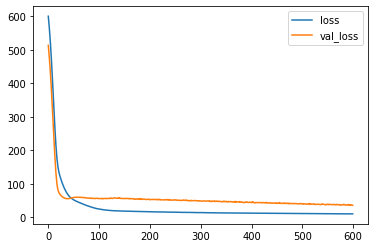

In [18]:
df1[ ["loss","val_loss"] ].plot()

In [19]:
r2_score(y_test, model.predict(X_test) )

0.812295284095335

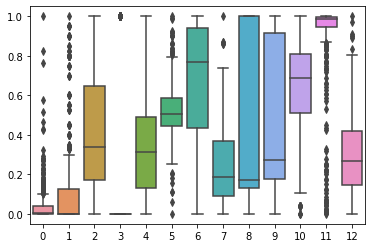

In [20]:
sns.boxplot(data=X)

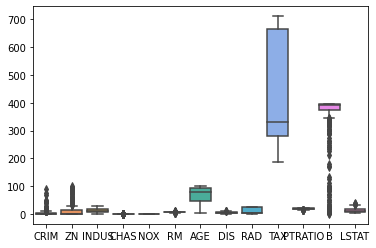

In [24]:
sns.boxplot(data=df.iloc[:, :-1])